# Kaggle Competition - Quant & Machine Learning Course
# Tutorial 7: Decision Tree Model

Tutorial modified based on https://github.com/amueller/ml-workshop-2-of-4/blob/master/notebooks/05%20-%20Trees.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
sklearn.set_config(print_changed_only=True)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

# Train a decision tree model
CART algorithm explained: https://www.youtube.com/watch?v=LDRbO9a6XPU&t=395s

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

# Tree Visualization

[Text(465.0, 503.3333333333333, 'worst perimeter <= 106.1\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(232.5, 302.0, 'worst concave points <= 0.134\ngini = 0.081\nsamples = 259\nvalue = [11, 248]'),
 Text(116.25, 100.66666666666663, 'gini = 0.008\nsamples = 240\nvalue = [1, 239]'),
 Text(348.75, 100.66666666666663, 'gini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(697.5, 302.0, 'worst concave points <= 0.142\ngini = 0.202\nsamples = 167\nvalue = [148, 19]'),
 Text(581.25, 100.66666666666663, 'gini = 0.497\nsamples = 37\nvalue = [20, 17]'),
 Text(813.75, 100.66666666666663, 'gini = 0.03\nsamples = 130\nvalue = [128, 2]')]

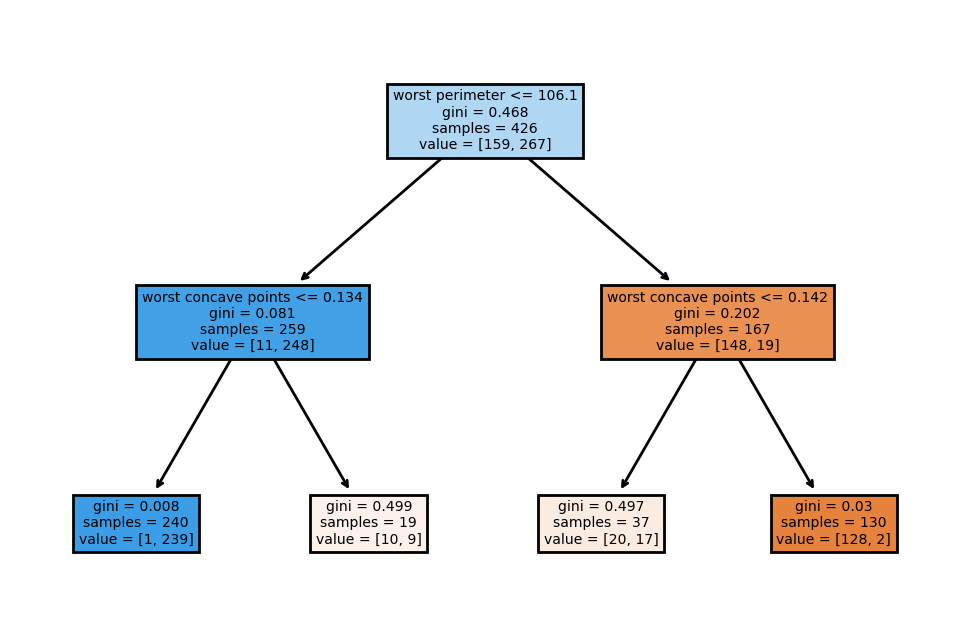

In [6]:
plt.figure(dpi=200)
plot_tree(tree, feature_names=cancer.feature_names, filled=True)

# Hyperparameters for Decision Trees:
- max_depth
- max_leaf_nodes
- min_samples_split
- min_impurity_decrease


[Text(391.375, 249.15, 'worst perimeter <= 106.1\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(139.5, 203.85000000000002, 'worst concave points <= 0.134\ngini = 0.081\nsamples = 259\nvalue = [11, 248]'),
 Text(62.0, 158.55, 'area error <= 48.975\ngini = 0.008\nsamples = 240\nvalue = [1, 239]'),
 Text(31.0, 113.25, 'gini = 0.0\nsamples = 239\nvalue = [0, 239]'),
 Text(93.0, 113.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(217.0, 158.55, 'worst texture <= 26.0\ngini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(155.0, 113.25, 'worst fractal dimension <= 0.122\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(124.0, 67.94999999999999, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(186.0, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(279.0, 113.25, 'smoothness error <= 0.006\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(248.0, 67.94999999999999, 'mean concavity <= 0.084\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(217.0, 22.6499

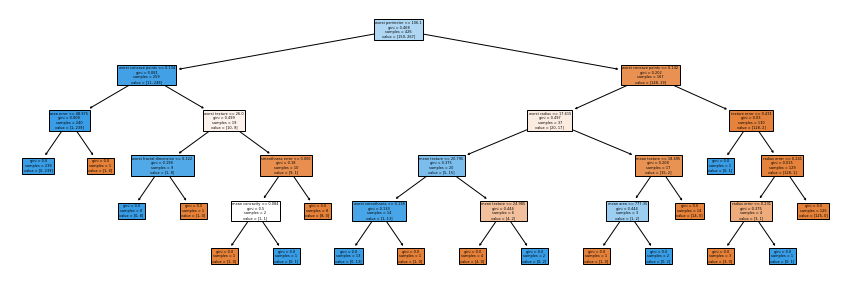

In [7]:
tree = DecisionTreeClassifier().fit(X_train, y_train)
plt.figure(figsize=(15, 5))
plot_tree(tree, feature_names=cancer.feature_names, filled=True)

[Text(232.5, 276.8333333333333, 'worst perimeter <= 106.1\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(93.0, 226.5, 'worst concave points <= 0.134\ngini = 0.081\nsamples = 259\nvalue = [11, 248]'),
 Text(46.5, 176.16666666666666, 'gini = 0.008\nsamples = 240\nvalue = [1, 239]'),
 Text(139.5, 176.16666666666666, 'worst texture <= 26.0\ngini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(93.0, 125.83333333333331, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(186.0, 125.83333333333331, 'gini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(372.0, 226.5, 'worst concave points <= 0.142\ngini = 0.202\nsamples = 167\nvalue = [148, 19]'),
 Text(325.5, 176.16666666666666, 'worst radius <= 17.615\ngini = 0.497\nsamples = 37\nvalue = [20, 17]'),
 Text(279.0, 125.83333333333331, 'mean texture <= 20.795\ngini = 0.375\nsamples = 20\nvalue = [5, 15]'),
 Text(232.5, 75.5, 'gini = 0.133\nsamples = 14\nvalue = [1, 13]'),
 Text(325.5, 75.5, 'mean texture <= 24.985\ngini = 0.444\nsamples 

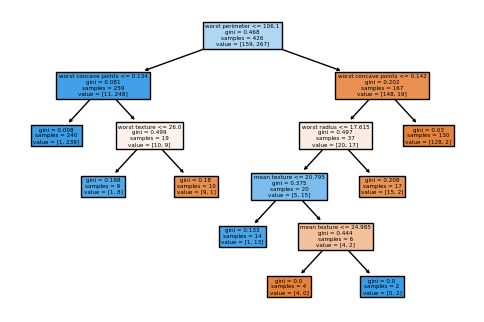

In [8]:
tree = DecisionTreeClassifier(max_leaf_nodes=8).fit(X_train, y_train)
plt.figure(dpi=100)
plot_tree(tree, feature_names=cancer.feature_names, filled=True)

[Text(422.72727272727275, 543.6, 'worst perimeter <= 106.1\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(253.63636363636363, 422.8, 'worst concave points <= 0.134\ngini = 0.081\nsamples = 259\nvalue = [11, 248]'),
 Text(169.0909090909091, 302.0, 'area error <= 48.975\ngini = 0.008\nsamples = 240\nvalue = [1, 239]'),
 Text(84.54545454545455, 181.2, 'gini = 0.0\nsamples = 239\nvalue = [0, 239]'),
 Text(253.63636363636363, 181.2, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(338.1818181818182, 302.0, 'gini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(591.8181818181819, 422.8, 'worst concave points <= 0.142\ngini = 0.202\nsamples = 167\nvalue = [148, 19]'),
 Text(507.27272727272725, 302.0, 'gini = 0.497\nsamples = 37\nvalue = [20, 17]'),
 Text(676.3636363636364, 302.0, 'texture error <= 0.431\ngini = 0.03\nsamples = 130\nvalue = [128, 2]'),
 Text(591.8181818181819, 181.2, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(760.9090909090909, 181.2, 'radius error <= 0.241\n

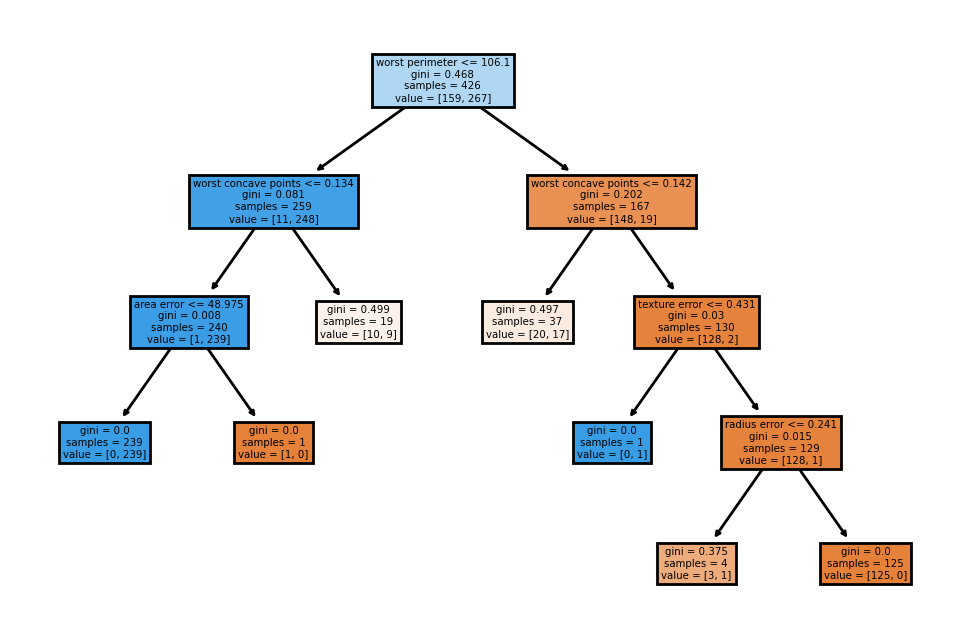

In [9]:
tree = DecisionTreeClassifier(min_samples_split=50).fit(X_train, y_train)
plt.figure(dpi=200)
plot_tree(tree, feature_names=cancer.feature_names, filled=True)

[Text(167.40000000000003, 190.26, 'worst perimeter <= 106.1\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(66.96000000000001, 135.9, 'worst concave points <= 0.134\ngini = 0.081\nsamples = 259\nvalue = [11, 248]'),
 Text(33.480000000000004, 81.53999999999999, 'gini = 0.008\nsamples = 240\nvalue = [1, 239]'),
 Text(100.44000000000001, 81.53999999999999, 'worst texture <= 26.0\ngini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(66.96000000000001, 27.180000000000007, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(133.92000000000002, 27.180000000000007, 'gini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(267.84000000000003, 135.9, 'worst concave points <= 0.142\ngini = 0.202\nsamples = 167\nvalue = [148, 19]'),
 Text(234.36, 81.53999999999999, 'worst area <= 952.9\ngini = 0.497\nsamples = 37\nvalue = [20, 17]'),
 Text(200.88000000000002, 27.180000000000007, 'gini = 0.375\nsamples = 20\nvalue = [5, 15]'),
 Text(267.84000000000003, 27.180000000000007, 'gini = 0.208\nsamples

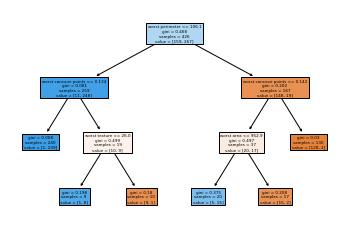

In [10]:
tree = DecisionTreeClassifier(min_impurity_decrease=.01).fit(X_train, y_train)
plot_tree(tree, feature_names=cancer.feature_names, filled=True)

In [11]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_leaf_nodes': range(2, 10)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=10,return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_leaf_nodes': range(2, 10)},
             return_train_score=True)

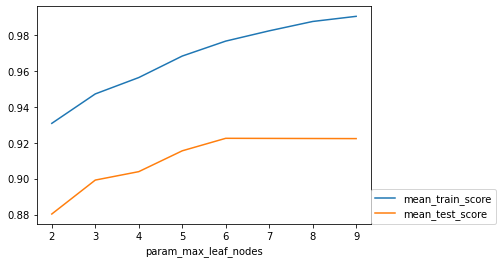

In [12]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes', y=['mean_train_score', 'mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))

<AxesSubplot:xlabel='param_max_leaf_nodes'>

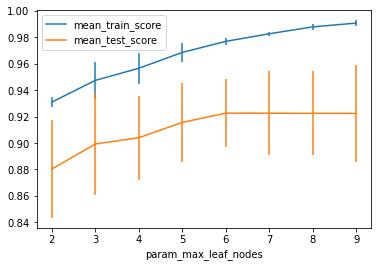

In [13]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_leaf_nodes', y='mean_test_score', yerr='std_test_score', ax=plt.gca())

In [14]:
grid.best_params_

{'max_leaf_nodes': 6}

[Text(348.75, 396.375, 'worst perimeter <= 106.1\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(139.5, 283.125, 'worst concave points <= 0.134\ngini = 0.081\nsamples = 259\nvalue = [11, 248]'),
 Text(69.75, 169.875, 'gini = 0.008\nsamples = 240\nvalue = [1, 239]'),
 Text(209.25, 169.875, 'worst texture <= 26.0\ngini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(139.5, 56.625, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(279.0, 56.625, 'gini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(558.0, 283.125, 'worst concave points <= 0.142\ngini = 0.202\nsamples = 167\nvalue = [148, 19]'),
 Text(488.25, 169.875, 'worst area <= 952.9\ngini = 0.497\nsamples = 37\nvalue = [20, 17]'),
 Text(418.5, 56.625, 'gini = 0.375\nsamples = 20\nvalue = [5, 15]'),
 Text(558.0, 56.625, 'gini = 0.208\nsamples = 17\nvalue = [15, 2]'),
 Text(627.75, 169.875, 'gini = 0.03\nsamples = 130\nvalue = [128, 2]')]

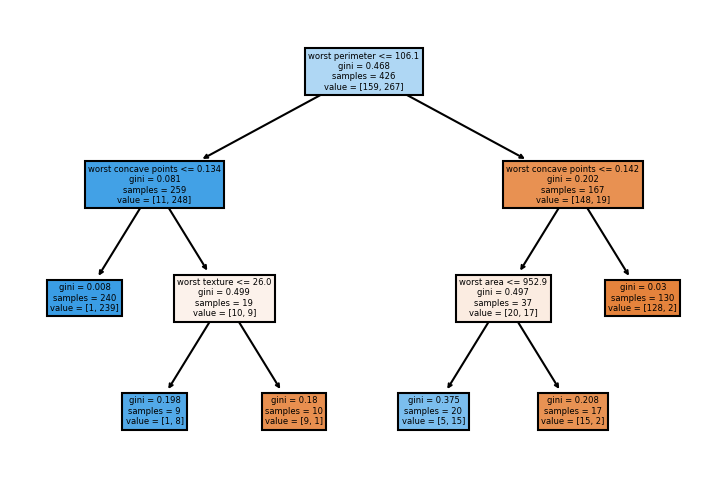

In [15]:
plt.figure(dpi=150)
plot_tree(grid.best_estimator_, feature_names=cancer.feature_names, filled=True)

<AxesSubplot:>

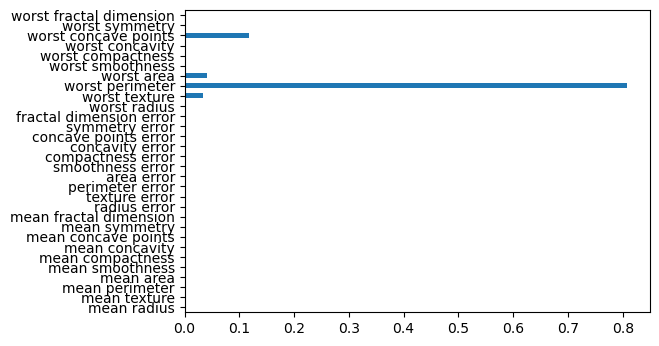

In [16]:
plt.figure(dpi=100)
pd.Series(grid.best_estimator_.feature_importances_,
          index=cancer.feature_names).plot(kind="barh")

In [17]:
grid.best_score_

0.9225359911406423

# Random Forest Model

- A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter 
- documentation https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0,max_depth=3)

In [24]:
param_grid = {'max_leaf_nodes': range(2, 10)}
grid = GridSearchCV(rf, param_grid=param_grid, cv=10,return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=3, random_state=0),
             param_grid={'max_leaf_nodes': range(2, 10)},
             return_train_score=True)

In [25]:
grid.best_params_

{'max_leaf_nodes': 6}

In [26]:
grid.best_score_

0.9531007751937984

<AxesSubplot:>

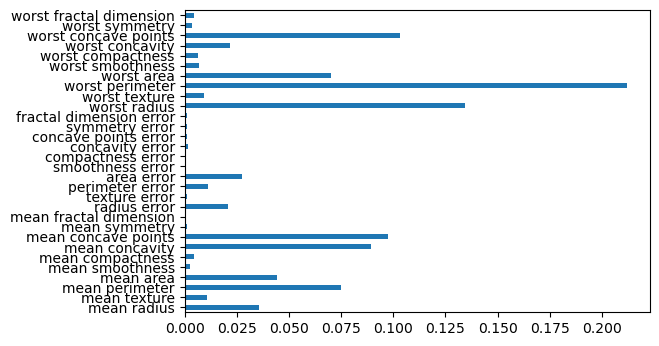

In [27]:
plt.figure(dpi=100)
pd.Series(grid.best_estimator_.feature_importances_,
          index=cancer.feature_names).plot(kind="barh")